In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-detection-fer/test/fearful/im292.png
/kaggle/input/emotion-detection-fer/test/fearful/im1022.png
/kaggle/input/emotion-detection-fer/test/fearful/im633.png
/kaggle/input/emotion-detection-fer/test/fearful/im934.png
/kaggle/input/emotion-detection-fer/test/fearful/im927.png
/kaggle/input/emotion-detection-fer/test/fearful/im966.png
/kaggle/input/emotion-detection-fer/test/fearful/im662.png
/kaggle/input/emotion-detection-fer/test/fearful/im648.png
/kaggle/input/emotion-detection-fer/test/fearful/im178.png
/kaggle/input/emotion-detection-fer/test/fearful/im817.png
/kaggle/input/emotion-detection-fer/test/fearful/im308.png
/kaggle/input/emotion-detection-fer/test/fearful/im623.png
/kaggle/input/emotion-detection-fer/test/fearful/im651.png
/kaggle/input/emotion-detection-fer/test/fearful/im72.png
/kaggle/input/emotion-detection-fer/test/fearful/im229.png
/kaggle/input/emotion-detection-fer/test/fearful/im444.png
/kaggle/input/emotion-detection-fer/test/fearful/im415.p

In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(directory):
    images = []
    labels = []
    emotion_labels = os.listdir(directory)

    for label, emotion in enumerate(emotion_labels):
        emotion_dir = os.path.join(directory, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale directly
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the training data
train_dir = '/kaggle/input/emotion-detection-fer/train'  # Change this to the correct path
X_train, y_train = load_and_preprocess_data(train_dir)

# Load and preprocess the test data
test_dir = '/kaggle/input/emotion-detection-fer/test'  # Change this to the correct path
X_test, y_test = load_and_preprocess_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(os.path.join(train_dir, 'fearful')))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the MobileNetV2 model
base_model = MobileNetV2(input_shape=(48, 48, 1), include_top=False, weights='imagenet')

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train, epochs=15, batch_size=32, validation_data=(X_val.reshape(-1, 48, 48, 1), y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
print(f'Test Accuracy: {test_accuracy}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ValueError: The input must have 3 channels; Received `input_shape=(48, 48, 1)`

Epoch 1/100
718/718 [==============================] - 40s 54ms/step - loss: 1.7446 - accuracy: 0.2919 - val_loss: 1.5835 - val_accuracy: 0.4054
Epoch 2/100
718/718 [==============================] - 39s 54ms/step - loss: 1.5390 - accuracy: 0.4000 - val_loss: 1.4444 - val_accuracy: 0.4465
Epoch 3/100
718/718 [==============================] - 39s 54ms/step - loss: 1.4183 - accuracy: 0.4534 - val_loss: 1.3536 - val_accuracy: 0.4842
Epoch 4/100
718/718 [==============================] - 39s 54ms/step - loss: 1.3444 - accuracy: 0.4878 - val_loss: 1.2895 - val_accuracy: 0.5146
Epoch 5/100
718/718 [==============================] - 38s 54ms/step - loss: 1.2816 - accuracy: 0.5124 - val_loss: 1.2623 - val_accuracy: 0.5219
Epoch 6/100
718/718 [==============================] - 40s 55ms/step - loss: 1.2365 - accuracy: 0.5308 - val_loss: 1.2403 - val_accuracy: 0.5404
Epoch 7/100
718/718 [==============================] - 38s 53ms/step - loss: 1.1849 - accuracy: 0.5498 - val_loss: 1.2151 - val_ac

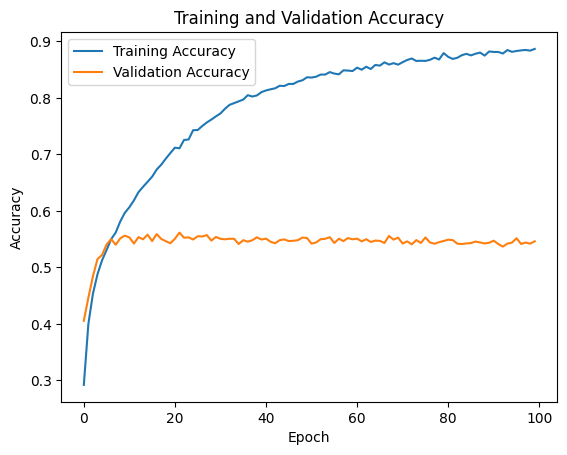

In [9]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_and_preprocess_data(directory):
    images = []
    labels = []
    emotion_labels = os.listdir(directory)

    for label, emotion in enumerate(emotion_labels):
        emotion_dir = os.path.join(directory, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Change the root directory to your new location
root_dir = '/kaggle/input/emotion-detection-fer/'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

# Load and preprocess the data
X_train, y_train = load_and_preprocess_data(train_dir)
X_test, y_test = load_and_preprocess_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(train_dir))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train, epochs=100, batch_size=32, validation_data=(X_val.reshape(-1, 48, 48, 1), y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
print(f'Test Accuracy: {test_accuracy}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
model.save('CNN.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
